In [2]:
import tifffile
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from skimage.filters import gaussian

In [62]:
fps = [
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/stitched/reg001_cyc004_ch002_Pan-CK.tif',
#     '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/stitched/reg001_cyc002_ch003_E-cadherin.tif',
]
img = np.asarray([tifffile.imread(fp) for fp in fps])
img = img.mean(axis=0)
# img = (
#     tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/stitched/reg001_cyc004_ch002_Pan-CK.tif') + tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_2/stitched/reg001_cyc002_ch003_E-cadherin.tif')) / 2.
img.shape

(20160, 14784)

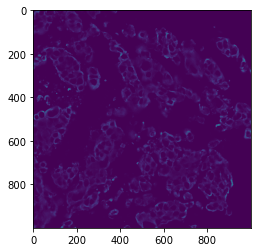

In [63]:
small = img[5000:6000, 5000:6000]
plt.imshow(small)

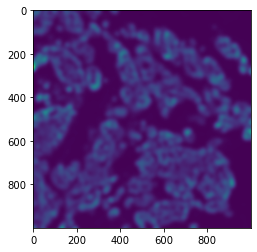

In [64]:
f = gaussian(small, sigma=10.)
plt.imshow(f)

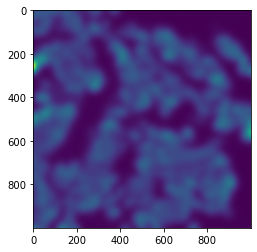

In [67]:
f = gaussian(small, sigma=20.)
plt.imshow(f)

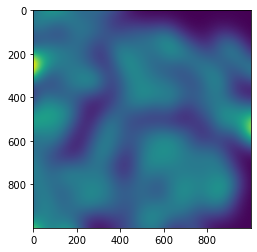

In [66]:
f = gaussian(small, sigma=50.)
plt.imshow(f)

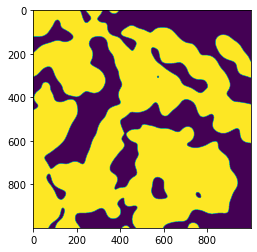

In [79]:
mask = np.zeros_like(f, dtype=bool)
mask[f>1000] = True
plt.imshow(mask)

In [80]:
from scipy.ndimage import binary_fill_holes

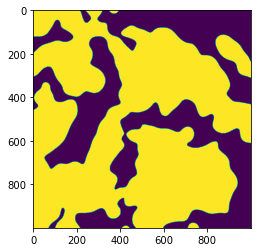

In [81]:
plt.imshow(binary_fill_holes(mask))

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

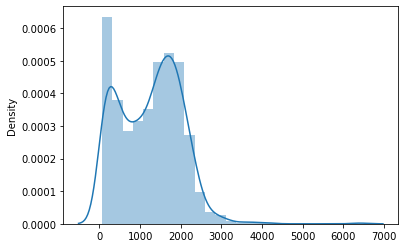

In [69]:
import seaborn as sns
vals = f.flatten()
sns.distplot(np.random.choice(vals, size=1000))

In [112]:
f = gaussian(img, sigma=5.)

In [113]:
mask = np.zeros_like(f, dtype=bool)
mask[f>500] = True

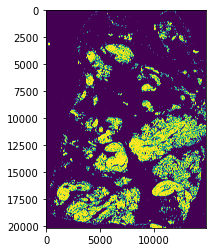

In [114]:
plt.imshow(mask)

In [115]:
filled = binary_fill_holes(mask)

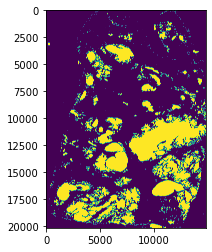

In [116]:
plt.imshow(filled)

In [117]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_3/annotations/tumor_mask_05_alpha.tif',
                data=filled)

In [ ]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_3/annotations/tumor_blurred.tif',
                data=f)

In [10]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_3/annotations/tumor_blurred.tif',
                data=f)

In [4]:

clf = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor.ome.tif')


In [5]:
clf.shape

(15120, 13440)

In [6]:
set(clf[:5000].flatten())

{0, 1}

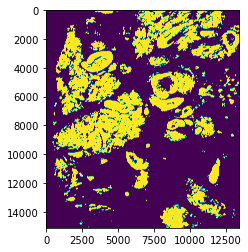

In [8]:
plt.imshow(clf)

In [13]:
holes = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor_holes.ome.tif')


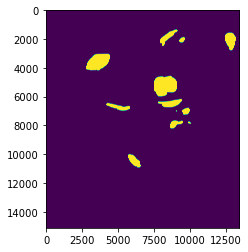

In [14]:
plt.imshow(holes)

In [15]:
np.unique(holes)

array([0, 1], dtype=uint8)

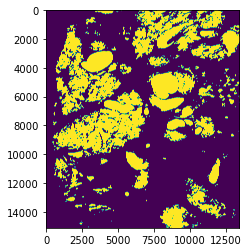

In [16]:
plt.imshow(holes | clf)

In [17]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor.tif',
                data=holes | clf)